<a href="https://colab.research.google.com/github/jehasbani/minimizing-churn-rate-through-analysis-of-financial-habits/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minimizing churn rate through analysis of financial habits

## Introduction
Subscription products are often the main source of revenue for companies across all industries. Regardless of how they structure their memberships, companies almost always try to minimize customer churn rate (subscription cancellations). To retain their customers, these companies need first to identify the patters that act as a catalyst in disengagement with product.

Here are some key definitions:


*   **Market:** The target audience is the entirety of the company's subscription base. They are the ones the companies aim to keep.
*   **Product:** The subscription products that customers are already enrolled in can provide value that users may not have imagined, or may have forgotten.
*   **Goal:**The objective of this model is to predict which users are likely to churn, so that the users can focus on re-engaging them with the product. 




## Business challenge
In this Case Study we will be working for a fintech company that provides a subscription product to its users. which allows them to manage their bank accounts (saving accounts, credit cards, etc), provides them with personalized coupons, informs them of the latest low-APR loans available in the market, and educates them on the best available methods to save money (like videos on saving money on taxes, free courses on financial health, etc).

We are in charge of identifying users who are likely to cancel their subscription so that we can start building new features that they may be interested in. These features can increase the engagement and interest of our users towards the product.

##Data

By subscribing to the membership, our customers have provided us with data on their finances, as well as how they handle those finances through the product. We also have some demographic information we acquired from them during the sign-up process.

Financial data can often be unreliable and delayed. As a result, companies can sometimes build their marketing models using only demographic data, and data related to finances handled through the product itself. Therefore, we will be restricting ourselves to only using that type of data. Furthermore, product-related data is more indicative of what new features we should be creating as a company.

---
## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
url = "https://raw.githubusercontent.com/jehasbani/minimizing-churn-rate-through-analysis-of-financial-habits/main/data/churn_data.csv"
df = pd.read_csv(url)

To get a detailed explanation of each field, see the "Churn Data Description.txt" file, otherwise most of the fields are self explanatory.

---
## Exploratory Data Analysis

In [ ]:
df.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0


In [ ]:
df.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,0.050630,0.013111,8.197852,0.952481,0.606074,0.561741,0.393926,0.587259,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,0.871366,0.238158,12.497243,0.212749,0.488628,0.496183,0.488628,0.492336,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,27.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


### Cleaning Data

#### Removing NaN

Let's find out which columns contain NaN values. If there are a just few nan values we can simply drop the records, but if we have too many NaNs, we may have to take remove the columns from the data. 

In [ ]:
df.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [ ]:
df.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

We can see that:

* age: Only 4 nan, no problem.
* credit_score: 8031 nan out of 27000 records, almost a third of the data. We should consider dropping this column.
* rewards_earned: 3227 nan out of 27000 records. Not as much as credit_score but still a lot and we can consider dropping this column as well.

Let's remove the records that contain null `age`

In [ ]:
df = df[pd.notnull(df['age'])]

and now we can drop the `credit_score` and `rewards_earned`

In [ ]:
df.drop(columns = ['credit_score','rewards_earned'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


---
### Histograms

In [ ]:
df_numerical = df.drop(columns=['user','churn'])

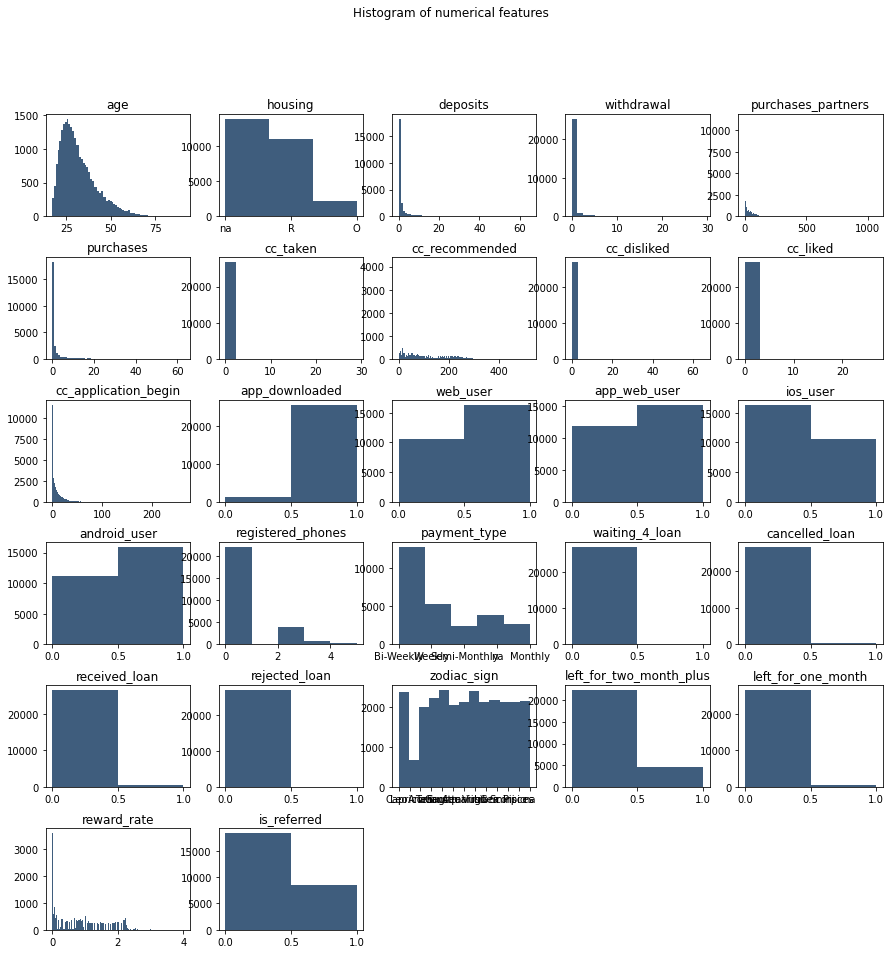

In [ ]:
fig,axes = plt.subplots(6,5, figsize=(15,15))

axes = axes.ravel()
for ax in axes:
  ax.set_axis_off()

plt.suptitle('Histogram of numerical features')
for i,col in enumerate(df_numerical.columns):
  axes[i].set_title(col)

  vals = np.size(df_numerical[col].unique())
  axes[i].hist(df_numerical[col].values, bins = vals, color = '#3f5d7d')
  axes[i].set_axis_on()

plt.subplots_adjust(hspace=0.4)


Key takeaways from this plot:

* There are a lot of binary variables, which we can better visualize with a pie plot.
* Many columns distribution are right tailed and heavily skewed towards the first values of the distribution (mainly 0).
* The zodiac sign columns shows an overall even distribution, except for capricorn. We could explore more on that later.


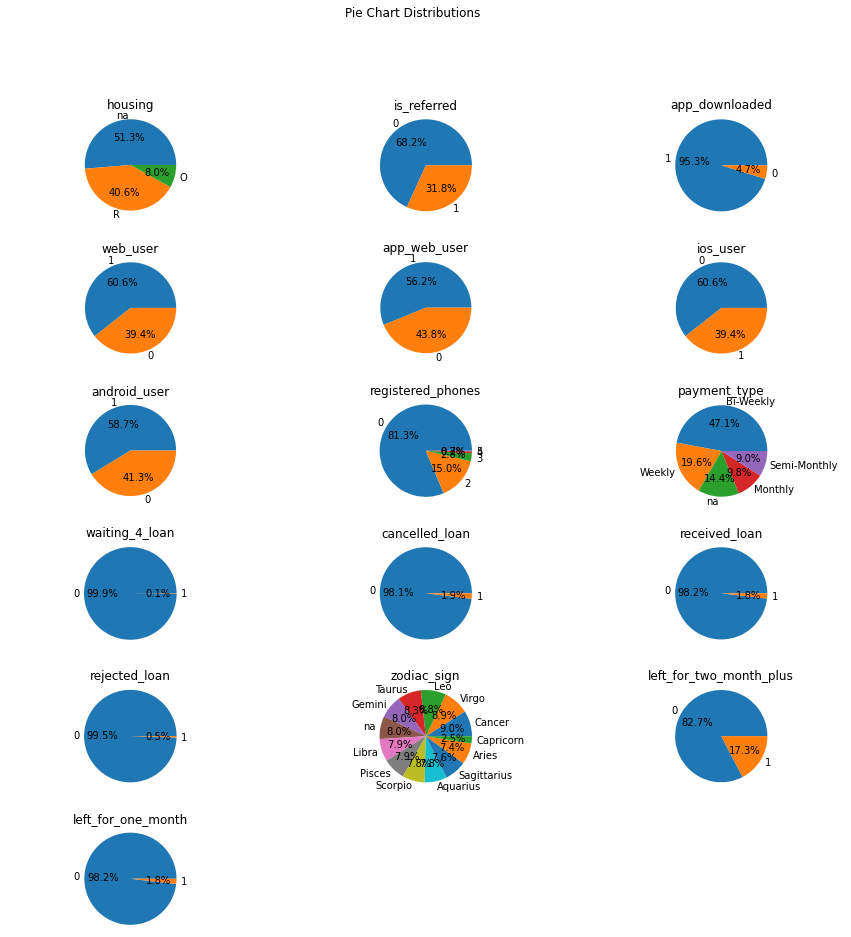

In [ ]:
fig,axes = plt.subplots(6,3, figsize=(15,15))

axes = axes.ravel()
for ax in axes:
  ax.set_axis_off()

binary_columns = ['housing', 'is_referred','app_downloaded','web_user', 'app_web_user', 'ios_user', 'android_user',
       'registered_phones', 'payment_type', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month']

plt.suptitle('Pie Chart Distributions')
for i,col in enumerate(binary_columns):
  axes[i].set_title(col)

  values = df[col].value_counts(normalize=True).values
  index = df[col].value_counts(normalize=True).index  

  axes[i].pie(values, labels = index, autopct='%1.1f%%')
  axes[i].axis('equal')
  axes[i].set_axis_on()

plt.subplots_adjust(hspace=0.4)


We see that there are a few columns that have some extreme distributions:
* waiting_4_loan
* cancelled_loan
* rejected_loan
* received_loan
* left_for_one_month

We are going to analyze the distribution of the target variable in the minority value for these columns. If we get only one value for churn, we can be certain that this column will add bias to our model.

In [ ]:
df[df.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [ ]:
df[df.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [ ]:
df[df.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [ ]:
df[df.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [ ]:
df[df.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

The distributions show both values for the response variables and none of them show an imbalance large enough to assume the field will cause bias in our model.

---
### Correlation with target plot

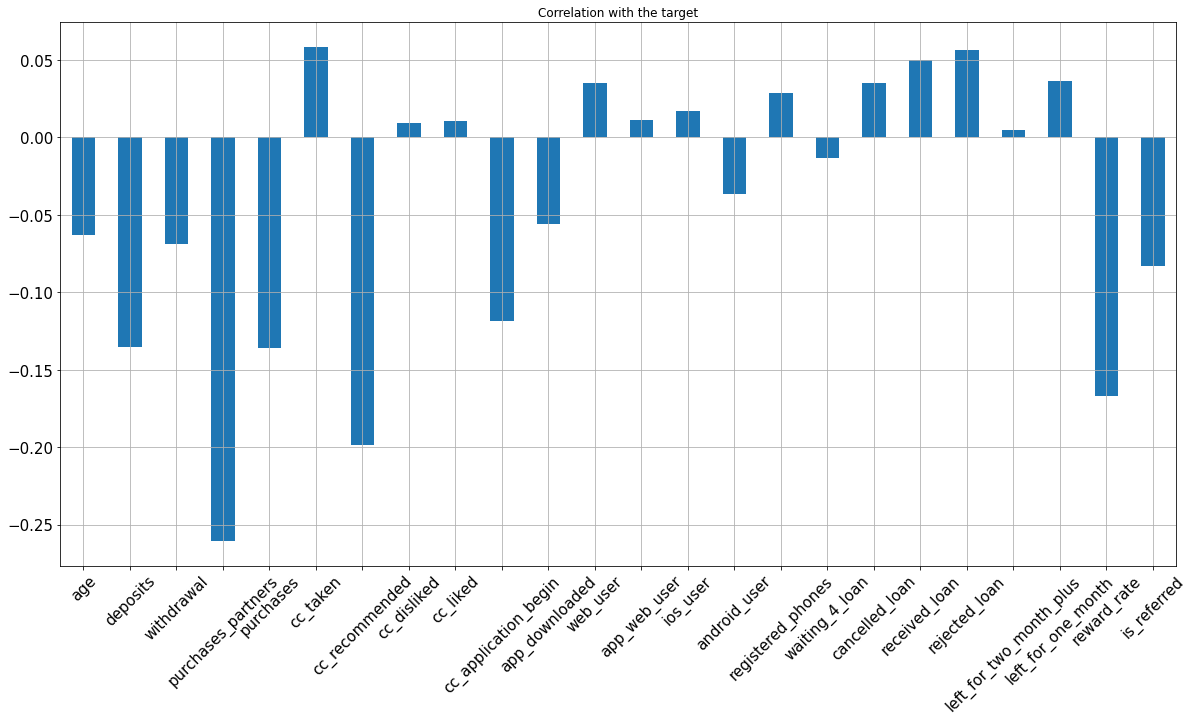

In [ ]:
df.drop(columns=['user','churn','housing','zodiac_sign', 'payment_type']).corrwith(df.churn).plot.bar(
    figsize=(20,10),
    title='Correlation with the target',
    fontsize=15,
    rot=45,
    grid=True
)
plt.show()

The constraints of the correlations values are approximately -0.25 and 0.05 which, in terms of correlation weight, are not very high values. We may try to draw some conclusions for educational purposes only, but we can clearly see that there is not a strong correlation between any of the variables and the target.

---
### Correlation Matrix

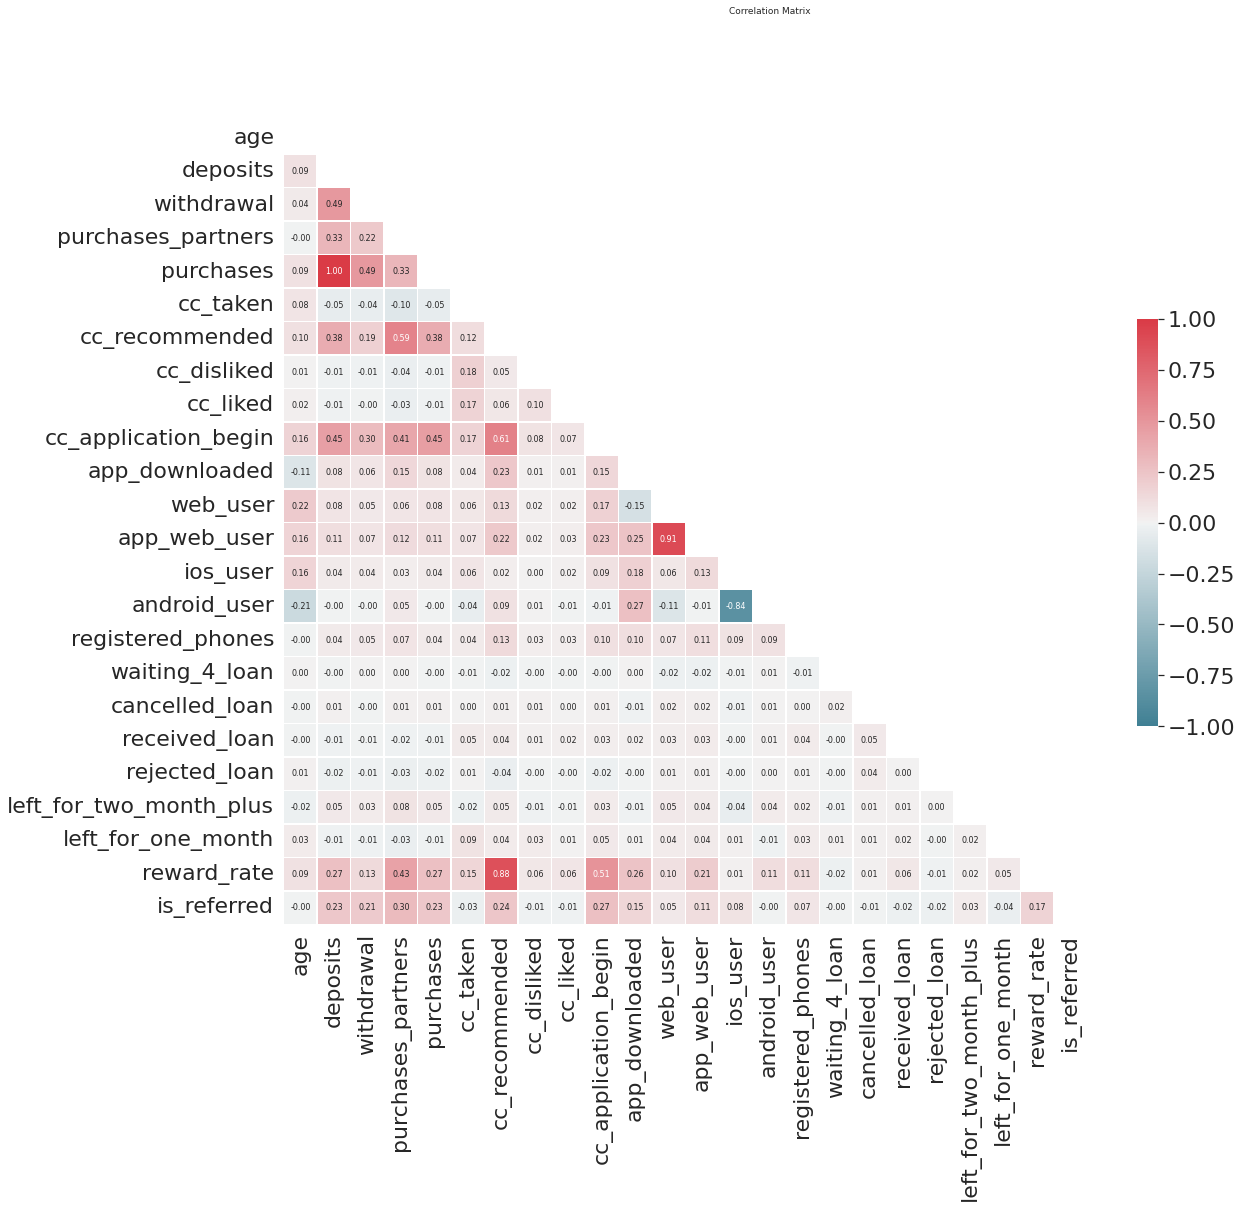

In [ ]:
corr = df.drop(columns=['user','churn']).corr() 
sns.set(style='white',font_scale=2)

# generate a mask for the upper triangle
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize = (18,15))
f.suptitle("Correlation Matrix", fontsize=9)

# generate a colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr,
            mask=mask,
            cmap=cmap, 
            vmax=1, vmin = -1, 
            center=0, 
            square=True, 
            linewidths=0.5, 
            cbar_kws={"shrink":0.5},
            annot=True,
            annot_kws={"fontsize":8},
            fmt='.2f')
plt.show()

Correlated columns (those with $|corr| \geq 0.7$) :

* purchases and deposits --> corr = 1
* app_web_user and web_user --> corr = 0.91 
* reward_rate and cc_recommended --> corr = 0.88
* android_user and ios_user --> corr = -0.84

From this we can exclude one of each from the analysis.

In [ ]:
df = df.drop(columns=['deposits','app_web_user','cc_recommended','android_user'])

Let's save our new dataset:

In [ ]:
df.to_csv(os.path.join(data_path,'clean_churn_data.csv'),index=False)

---
## Data preprocessing

In [3]:
clean_url = "https://raw.githubusercontent.com/jehasbani/minimizing-churn-rate-through-analysis-of-financial-habits/main/data/clean_churn_data.csv"
df = pd.read_csv(clean_url)

In [ ]:
user_id = df.user
df.drop(columns=['user'],inplace=True)

### One-Hot Enconding

In [ ]:
df = pd.get_dummies(df,drop_first=True)

We set the `drop_first` field to True because `pandas.get_dummies` yields one column per value of the categorical column. We need to drop one of the generated columns because otherwise the dummy columns would not be independent.

Visit this [link](https://datascience.stackexchange.com/questions/27957/why-do-we-need-to-discard-one-dummy-variable) for more information.

### Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df.churn
X = df.drop(columns=['churn'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

### Balancing the training set

In [ ]:
y_train.value_counts(normalize=True)

0    0.586034
1    0.413966
Name: churn, dtype: float64

There is a slight imbalance in the training set (60/40). This means that if we get an accuracy of around 60%, it means that the model is no better than a random choice over the 0s (if we always predict 0 we will be correct 60% of the time). That's why we need to balance the data to 50/50, so that when we get accuracies over 50% we know that it's an improvement over the random choice option.

To accomplish this we'll downsample the majority class (we could upsample the the minority class, but since the imbalance is not so big we can still use the simpler approach of downsampling).

In [ ]:
pos_indexes = y_train[y_train == 1].index
neg_indexes = y_train[y_train == 0].index

In [ ]:
if len(pos_indexes) > len(neg_indexes):
  higher = pos_indexes
  lower = neg_indexes
else:
  higher = neg_indexes
  lower = pos_indexes

In [ ]:
import random
random.seed(0)

In [ ]:
higher = np.random.choice(higher, size=len(lower))
lower = np.asanyarray(lower)
new_indexes = np.concatenate((lower,higher))

In [ ]:
X_train = X_train.loc[new_indexes,:]
y_train = y_train[new_indexes]

In [ ]:
y_train.value_counts(normalize=True)

1    0.5
0    0.5
Name: churn, dtype: float64

And now we have a balanced training set.

### Feature Scaling

In [ ]:
binary_columns = ['is_referred','app_downloaded','web_user', 'ios_user',
       'registered_phones', 'waiting_4_loan', 'cancelled_loan','received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month','zodiac_sign_Aries',
 'zodiac_sign_Cancer','zodiac_sign_Capricorn','zodiac_sign_Gemini','zodiac_sign_Leo','zodiac_sign_Libra',
 'zodiac_sign_Pisces','zodiac_sign_Sagittarius','zodiac_sign_Scorpio', 'zodiac_sign_Taurus', 'zodiac_sign_Virgo',
 'zodiac_sign_na','housing_R','housing_na','payment_type_Monthly',
 'payment_type_Semi-Monthly',
 'payment_type_Weekly',
 'payment_type_na']

num_cols = [col for col in X_train.columns if col not in binary_columns ]

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer

In [ ]:
ct = ColumnTransformer([
        ('scaler', StandardScaler(), num_cols),
        ('minmax',MinMaxScaler(),binary_columns)
    ], remainder='passthrough')

X_train_sc = pd.DataFrame(ct.fit_transform(X_train),columns=num_cols + binary_columns,index=X_train.index)

In [ ]:
X_test_sc = pd.DataFrame(ct.transform(X_test),columns=num_cols + binary_columns)

In [ ]:
X_train_sc.describe()

,age,withdrawal,purchases_partners,purchases,cc_taken,cc_disliked,cc_liked,cc_application_begin,reward_rate,is_referred,app_downloaded,web_user,ios_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo,zodiac_sign_na,housing_R,housing_na,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,payment_type_na
count,1.788000e+04,1.788000e+04,1.788000e+04,1.788000e+04,1.788000e+04,1.788000e+04,1.788000e+04,1.788000e+04,1.788000e+04,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,6.808871e-16,7.492453e-16,-4.782770e-15,4.637101e-15,4.756328e-15,3.395633e-15,5.315255e-15,-3.448030e-15,-4.109960e-15,0.314765,0.952181,0.611409,0.395302,0.083826,0.001454,0.020414,0.018177,0.005481,0.170861,0.018736,0.073658,0.088479,0.026734,0.080984,0.085794,0.079362,0.078635,0.076063,0.077852,0.081432,0.090268,0.080313,0.403188,0.518736,0.099720,0.087416,0.195638,0.144016
std,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,0.464435,0.213389,0.487444,0.488929,0.182965,0.038107,0.141415,0.133594,0.073833,0.376398,0.135595,0.261220,0.283998,0.161309,0.272819,0.280068,0.270311,0.269176,0.265106,0.267947,0.273505,0.286574,0.271785,0.490552,0.499663,0.299635,0.282452,0.396702,0.351115
min,-1.528619e+00,-2.877821e-01,-6.407143e-01,-3.590805e-01,-1.650839e-01,-6.204128e-02,-7.364337e-02,-6.544215e-01,-1.186049e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.171707e-01,-2.877821e-01,-6.407143e-01,-3.590805e-01,-1.650839e-01,-6.204128e-02,-7.364337e-02,-6.544215e-01,-9.178488e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.100156e-01,-2.877821e-01,-4.697985e-01,-3.590805e-01,-1.650839e-01,-6.204128e-02,-7.364337e-02,-3.234203e-01,-1.802992e-01,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000017e-01,-2.877821e-01,3.359473e-01,-2.422043e-01,-1.650839e-01,-6.204128e-02,-7.364337e-02,2.558317e-01,7.852204e-01,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,5.774416e+00,2.778762e+01,2.541173e+01,6.770366e+00,6.236181e+01,7.969944e+01,6.203689e+01,2.110890e+01,4.177949e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---
## Model building

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0)

In [ ]:
clf.fit(X_train_sc,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = clf.predict(X_test_sc)

Now we can evaluate the predictions by using some common classification metrics. Let's review them:

- Precision = $\frac{TP}{TP+FP}$ measures how many observations predicted as positive are in fact positive. 
- Recall = $\frac{TP}{TP+FN}$, also known as *true positive rate* or *sensitivity*, it measures how many observations out of all positive observations have we classified as positive.
- Accuracy =  $\frac{TP+TN}{TP+TN+FP+FN}$ It measures how many observations, both positive and negative, were correctly classified. It shouldn't be used in imbalanced problems, but in this case we are safe.
- F1-Score = $\frac{precision*recall}{precision+recall}$ simply put, it combines precision and recall into one metric. The higher the score the better our model is.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

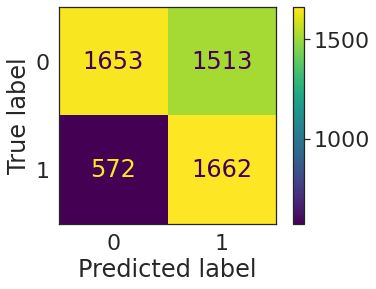

Accuracy: 0.6139
Precision: 0.5235
Recall: 0.7440
F1: 0.6145


In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.grid(False)
plt.show()

print(f"Accuracy: {accuracy:.4f}") 
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}") 
print(f"F1: {f1:.4f}")

Let's perform cross validation to have a more accurate sense of the model's performance

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_acc_scores = cross_val_score(estimator = clf, X=X_train_sc, y=y_train, cv=10)
print(f"Logistic regression accuracy: {cv_acc_scores.mean():.4f} (+/- {cv_acc_scores.std()*2:.4f})")

Logistic regression accuracy: 0.6461 (+/- 0.0315)


We can analyze the coefficien the LR model assigned to each feature:

In [ ]:
pd.concat([pd.DataFrame(X_train.columns, columns=["features"]),
          pd.DataFrame(np.transpose(clf.coef_), columns=["coef"])],
          axis=1)

,features,coef
0,age,-0.148371
1,withdrawal,0.046892
2,purchases_partners,-0.709536
3,purchases,-0.134389
4,cc_taken,0.085585
5,cc_disliked,-0.011446
6,cc_liked,0.023071
7,cc_application_begin,0.057542
8,app_downloaded,-0.164264
9,web_user,0.014260


### Feature Selection

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
clf = LogisticRegression(max_iter=250)

In [ ]:
X_train_sc.shape

(17880, 38)

We currently have 38 features, so we can start by reducing them to 20 and see if the performance of the model suffers.

In [ ]:
rfe = RFE(clf, n_features_to_select=20)

In [ ]:
rfe.fit(X_train_sc,y_train)

RFE(estimator=LogisticRegression(max_iter=250), n_features_to_select=20)

In [ ]:
rfe.ranking_

array([ 1, 13,  1,  1,  1, 19, 16,  8,  1, 17,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  4,  6, 10, 15,  3, 11,  1,  5,  9, 12,  2,  7,  1,  1,
       14, 18,  1,  1])

Now let's retrain our previous model using the top 20 features:

In [ ]:
clf = LogisticRegression(random_state=0)

In [ ]:
clf.fit(X_train_sc[X_train_sc.columns[rfe.support_]],y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = clf.predict(X_test_sc[X_train_sc.columns[rfe.support_]])

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

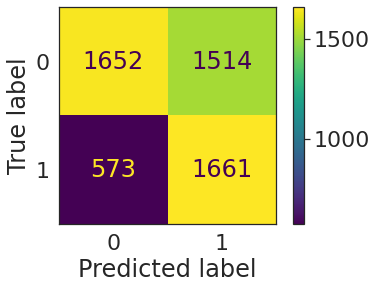

Accuracy: 0.6135
Precision: 0.5231
Recall: 0.7435
F1: 0.6142


In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.grid(False)
plt.show()

print(f"Accuracy: {accuracy:.4f}") 
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}") 
print(f"F1: {f1:.4f}")

Let's perform cross validation to have a more accurate sense of the model's performance

In [ ]:
cv_acc_scores = cross_val_score(estimator = clf, X=X_train_sc[X_train_sc.columns[rfe.support_]], y=y_train, cv=10)
print(f"Logistic regression accuracy: {cv_acc_scores.mean():.4f} (+/- {cv_acc_scores.std()*2:.4f})")

Logistic regression accuracy: 0.6434 (+/- 0.0299)


We notice that the performance of the model with 20 is pretty much the same as with all of the features. This is an important conclusion because we can generate a lighter and faster model with less features and get almost the same results.

In [ ]:
pd.concat([pd.DataFrame(X_train_sc.columns[rfe.support_], columns=["features"]),
          pd.DataFrame(np.transpose(clf.coef_), columns=["coef"])],
          axis=1)

,features,coef
0,age,-0.142459
1,purchases_partners,-0.695121
2,purchases,-0.092280
3,cc_taken,0.095738
4,reward_rate,-0.150095
5,app_downloaded,-0.144607
6,web_user,0.243965
7,ios_user,0.177870
8,registered_phones,0.694540
9,waiting_4_loan,-0.993177


From this table we can see which of the 20 remaining features is more important.

## Formatting the results

In [ ]:
final_results = pd.concat([y_test,user_id], axis=1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user','churn','predicted_churn']]

In [ ]:
final_results.reset_index(drop=True)

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
...,...,...,...
5395,22377,0.0,1
5396,24291,1.0,1
5397,23740,0.0,1
5398,47663,1.0,0


---
## Conclusion

Our model has provided us with an indication of which users are likely to churn. We have purposefully left the date of the expected churn open-ended because we are focused on only gauging the features that indicate disengagement with the product, and not the exact manner (like timeframe) in which users will disengage. In this case study we have chosen this open-ended emphasis to get a sense of those who are even just a bit likely to churn because we are not aiming to create new products for people who are going to leave us for sure, but for people who are starting to lose interest in the app. 

If, after creating new product features, we start seeing our model predict that less of our users are going to churn, then we can assume our customers are feeling more engaged with what we are offering them. We can move forward with these efforts by inquiring the opinions of our users about our new features leg polist. If we want to transition into predicting churn more accurately, in order to put emphasis strictly on those leaving us then we can add a time dimension to churn, which would add more accuracy to our model.